### This example shows how to plot time series data

In [1]:
import sys
sys.dont_write_bytecode = True
sys.path.append('../')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import plot_utils as pu

In [4]:
%matplotlib inline

### Data: unemployment rate (1976 to 2017)

Data downloaded from the Bureau of Labor Statistics website (https://www.bls.gov/eag/).

In [5]:
df = pd.read_csv('./datasets/Unemployment_rate_1976-2017.csv', index_col=0)

In [6]:
df.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
date,,,,,,,,,,,,,,,,,,,,,
1976-01,7.2,6.9,7.6,10.7,9.2,5.5,10.0,9.2,7.1,9.9,...,3.3,6.2,5.9,6.0,6.0,8.8,8.8,6.0,7.9,4.2
1976-02,7.1,6.7,7.5,10.5,9.1,5.5,9.9,9.1,7.4,9.7,...,3.2,6.1,5.9,5.9,5.9,8.8,8.7,5.9,7.9,4.2
1976-03,7.1,6.6,7.4,10.2,9.0,5.5,9.8,9.0,7.7,9.5,...,3.1,6.0,5.9,5.8,5.9,8.7,8.7,5.7,7.9,4.2
1976-04,7.0,6.5,7.3,10.0,9.0,5.5,9.7,8.8,8.1,9.3,...,3.1,5.9,5.9,5.7,5.8,8.7,8.7,5.6,7.9,4.1
1976-05,7.0,6.4,7.2,9.8,8.9,5.5,9.6,8.7,8.5,9.1,...,3.0,5.8,5.9,5.6,5.8,8.6,8.7,5.5,7.8,4.1


### Plot a single time series: California unemployment rate

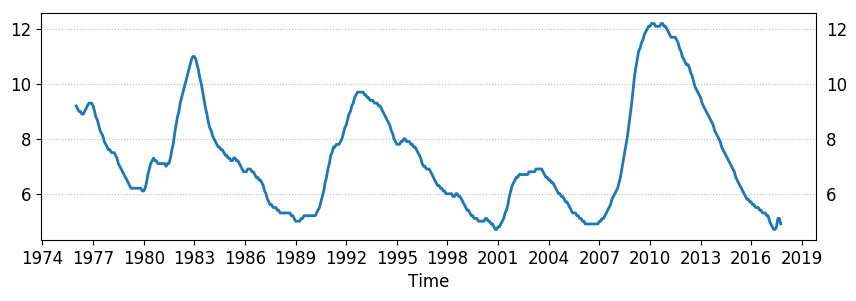

In [7]:
pu.plot_timeseries(df['CA']);  # with all other arguments by default

### Single time series with customizable options: Texas unemployment rate, last 10 years only

With a lot of (but not all) keyword arguments:

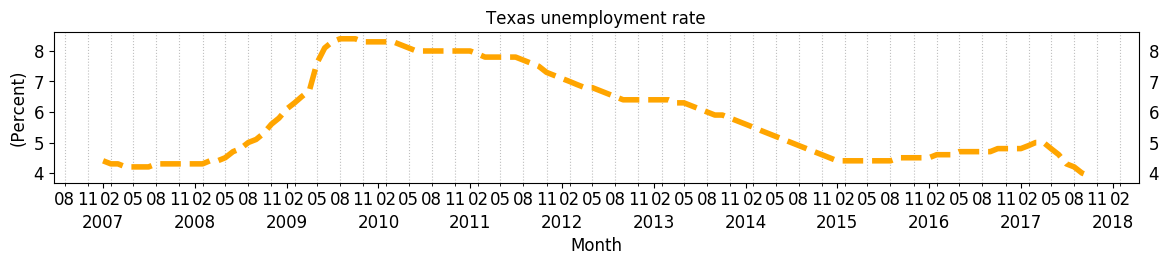

In [8]:
pu.plot_timeseries(df.loc['2007-01':,'TX'],figsize=(14,2),xlabel='Month',ylabel='(Percent)',ygrid_on=False,
                   color='orange',lw=4,ls='--',title='Texas unemployment rate');

### Plot multiple time series using `plot_multiple_timeseries`:

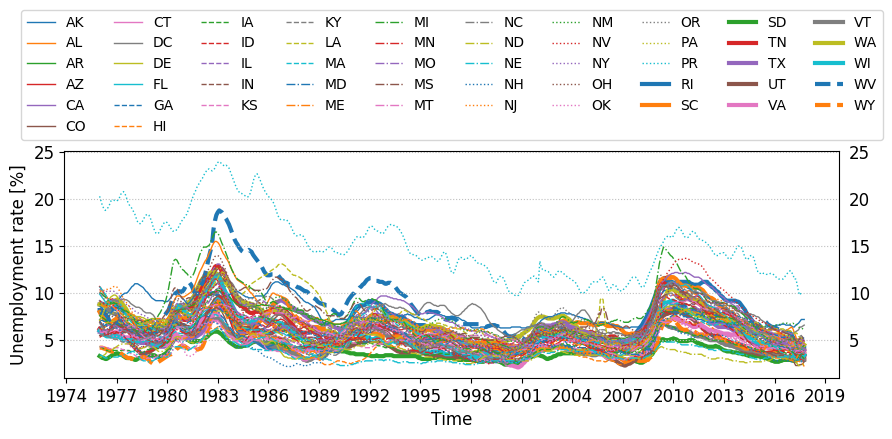

In [9]:
pu.plot_multiple_timeseries(df,ylabel='Unemployment rate [%]',ncol_legend=10);  # many other keyword arguments can be customized

### Plot time series with shaded upper/lower bounds

Simplistically, just use a constant error margin ('2') around CA unemployment rate:

In [10]:
ub = df['CA'] + 2  # upper bound
lb = df['CA'] - 2  # lower bound

In [11]:
ub.head()

date
1976-01    11.2
1976-02    11.1
1976-03    11.0
1976-04    11.0
1976-05    10.9
Name: CA, dtype: float64

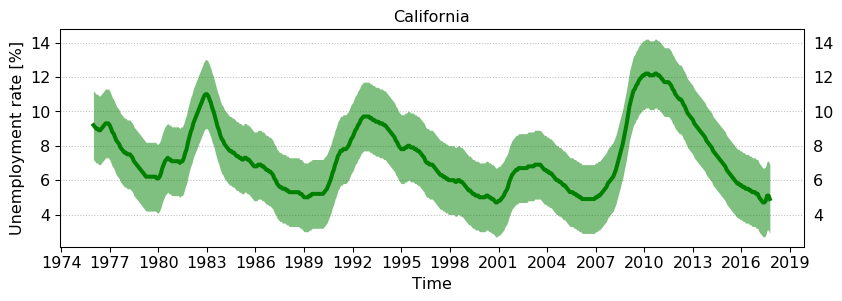

In [12]:
pu.fill_timeseries(df['CA'],ub,lb,color='green',ylabel='Unemployment rate [%]',title='California');

Note: since plotting error bounds makes the graph more busy, plotting multiple time series (e.g., CA, TX, and MD) with shaded bounds are not encouraged (hence not supported).